# <div style='text-align: center;'>Data Normalization and Feature Selection Impact Analysis on Diabetes Dataset<br></div>

### <div style='text-align: center;'>Name: Bikash Sharma<br><br>National Institute Of Technology,  Silchar</div>


### Objective

The objective of this task is to perform data normalization using **standardization** (z-score) and evaluate the impact of various feature selection techniques on the performance of models like **Decision Tree** and **k-NN** (with k values of 3, 5, 7, and 9) on the **Diabetes Dataset**.

### Steps to Follow:

1. **Normalize the data** using standardization (z-score).

2. **Evaluate models using**:
   - **Decision Tree** Classifier
   - **k-NN** Classifier (with k=3, 5, 7, 9)
   
3. **Visualize the model** using graph.
   
4. **Apply feature selection techniques**:
   - **Pearson's Correlation**
   - **Information Gain**
   - **Fisher Score**
   - **Analysis of Variance (ANOVA)**
   - **Chi-Square**
   - **Correlation Coefficient**
   - **Variance Threshold**
   - **Mean Absolute Difference (MAD)**
   - **Dispersion Ratio**
   - **Mutual Dependence**
   - **Relief**
   - **Missing Value Ratio**

5. **Apply Feature Selection Algorithms**:
   - **Exhaustive Feature Selection**
   - **Forward Feature Selection**
   - **Backward Feature Elimination**
   - **Recursive Feature Elimination**
   - **Bi-directional Elimination**

### Import the Python library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import (
    SelectKBest, f_classif, chi2, mutual_info_classif, VarianceThreshold
)
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.base import clone

## Step 1: Load the Dataset

In [ ]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,5,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,4.0,35.0,168.0,43.1,2.288,33,1.0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,657.0,4.165906,3.095265,1.0,2.00000,3.0000,6.0000,17.00
Glucose,763.0,99.310616,55.115381,1.0,72.50000,113.0000,138.0000,199.00
BloodPressure,733.0,55.706685,29.878852,1.0,16.00000,66.0000,76.0000,122.00
SkinThickness,541.0,25.876155,12.967816,1.0,18.00000,27.0000,35.0000,99.00
Insulin,394.0,105.659898,116.862508,1.0,21.00000,71.0000,151.0000,846.00
BMI,757.0,29.865654,10.686049,2.0,25.40000,32.0000,36.1000,67.10
DiabetesPedigreeFunction,768.0,0.490439,0.346050,0.1,0.25375,0.3825,0.6475,2.42
Age,768.0,30.990885,13.281475,3.0,23.00000,28.0000,38.2500,81.00
Outcome,268.0,1.000000,0.000000,1.0,1.00000,1.0000,1.0000,1.00


## Step 2 : Check Missing Value Present or not

In [ ]:
print(data.isnull().sum())
data.shape

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


(768, 9)

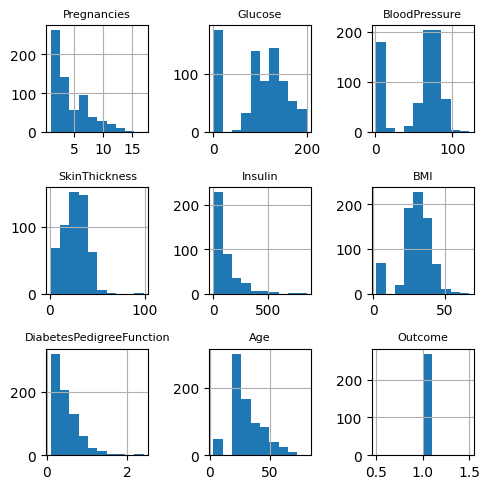

In [ ]:
p = data.hist(figsize = (5,5))
for ax in p.flatten():
    ax.set_title(ax.get_title(), fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

## Step 3 : Remove the Missing Value using Mean

In [ ]:
data["Pregnancies"] = data["Pregnancies"].replace(np.NaN, data["Pregnancies"].mean())
data["Glucose"] = data["Glucose"].replace(np.NaN, data["Glucose"].mean())
data["BloodPressure"] = data["BloodPressure"].replace(np.NaN, data["BloodPressure"].mean())
data["SkinThickness"] = data["SkinThickness"].replace(np.NaN, data["SkinThickness"].mean())
data["Insulin"] = data["Insulin"].replace(np.NaN, data["Insulin"].mean())
data["BMI"] = data["BMI"].replace(np.NaN, data["BMI"].mean())
data["Outcome"].fillna(0, inplace=True)

In [ ]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,105.659898,33.6,0.627,5,1.0
1,1.000000,85.0,66.0,29.000000,105.659898,26.6,0.351,31,0.0
2,8.000000,183.0,64.0,25.876155,105.659898,23.3,0.672,32,1.0
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.0
4,4.165906,137.0,4.0,35.000000,168.000000,43.1,2.288,33,1.0


### Separate features (X) and target (y)

In [ ]:
# Assuming the last column is the target variable, and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = (y > y.mean()).astype(int)
print("Feature matrix shape:", X.head())
print("Target vector shape:", y.head())

Feature matrix shape:    Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0     6.000000    148.0           72.0      35.000000  105.659898  33.6   
1     1.000000     85.0           66.0      29.000000  105.659898  26.6   
2     8.000000    183.0           64.0      25.876155  105.659898  23.3   
3     1.000000     89.0           66.0      23.000000   94.000000  28.1   
4     4.165906    137.0            4.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627    5  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
Target vector shape: 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int32


## Step 4 : Normalize the Data (Z-score normalization)

In [ ]:
# Normalize the data using Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    random_state=42)
# Dictionary to store results
results = {}

## Step 5 : Train Models and Evaluate Performance

In [ ]:
# Decision Tree and k-NN for evaluation
def evaluate_model(X_train, X_test, y_train, y_test):
    metrics = {}
    # Decision Tree
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    dt.fit(X_train, y_train)
    metrics['Decision Tree'] = accuracy_score(y_test, dt.predict(X_test))
    # k-NN with varying k
    for k in [3, 5, 7, 9]:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        metrics[f'k-NN (k={k})'] = accuracy_score(y_test, knn.predict(X_test))
    return metrics

## Step 6 : Visualization

In [ ]:
def plot_feature_selection_results(technique, metrics):
    # Prepare data for plotting
    models = list(metrics.keys())
    accuracies = list(metrics.values())

    cmap = plt.cm.get_cmap('viridis')
    colors = [cmap(acc) for acc in accuracies]

    # Plot the graph for the current feature selection technique
    plt.figure(figsize=(4, 3))  # Set smaller figure size
    plt.bar(models, accuracies, color=colors, edgecolor='black')

    plt.title(f'Performance of Models - {technique}', fontsize=10)
    plt.xlabel('Models', fontsize=8)
    plt.ylabel('Accuracy', fontsize=8)
    plt.ylim(0, 1)  # Accuracy range is [0, 1]
    plt.xticks(rotation=45, fontsize=7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate accuracy values on the bars with smaller font size
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', fontsize=6)

    # Add a color bar for reference (optional)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])  # Required for color bar
    cbar = plt.colorbar(sm, orientation='vertical', shrink=0.7, pad=0.1)
    cbar.set_label('Accuracy', fontsize=8)
    cbar.ax.tick_params(labelsize=6)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


## Feature Selection Techniques

### i. Pearson's correlation

In [ ]:
# i. Pearson's correlation
correlation_matrix = pd.DataFrame(X_train).corrwith(pd.Series(y_train))
selected_features = correlation_matrix.abs().sort_values(ascending=False).index[:5]
results['Pearson correlation'] = evaluate_model(X_train[:, selected_features],
                                                X_test[:, selected_features], y_train,
                                                y_test)

for technique, metrics in results.items():
    if technique == 'Pearson correlation':  # Ensure you print only the Pearson results
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Pearson correlation
 - Decision Tree: 60.3896
 - k-NN (k=3): 63.6364
 - k-NN (k=5): 62.3377
 - k-NN (k=7): 61.6883
 - k-NN (k=9): 66.2338


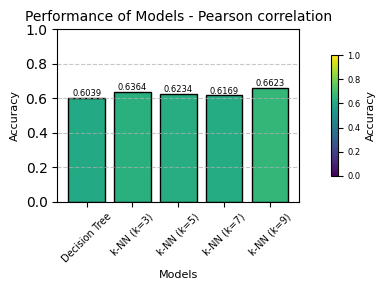

In [ ]:
plot_feature_selection_results("Pearson correlation", results["Pearson correlation"])

### ii. Information Gain

In [ ]:
# ii. Information Gain
info_gain = mutual_info_classif(X_train, y_train)
selected_features = np.argsort(info_gain)[-5:]
results['Information Gain'] = evaluate_model(X_train[:, selected_features],
                                             X_test[:, selected_features], y_train,
                                             y_test)

for technique, metrics in results.items():
    if technique == 'Information Gain':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Information Gain
 - Decision Tree: 73.3766
 - k-NN (k=3): 69.4805
 - k-NN (k=5): 71.4286
 - k-NN (k=7): 73.3766
 - k-NN (k=9): 76.6234


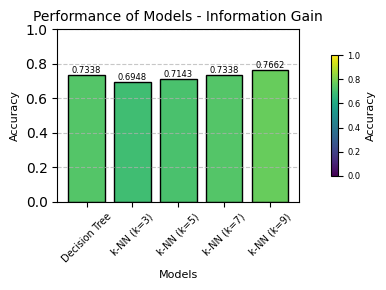

In [ ]:
plot_feature_selection_results("Information Gain", results["Information Gain"])

### iii. Fisher Score

In [ ]:
# iii. Fisher Score (uses ANOVA F-statistics)
fisher_score = SelectKBest(f_classif, k=5).fit(X_train, y_train)
selected_features = fisher_score.get_support(indices=True)
results['Fisher Score'] = evaluate_model(X_train[:, selected_features],
                                         X_test[:, selected_features], y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Fisher Score':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Fisher Score
 - Decision Tree: 73.3766
 - k-NN (k=3): 69.4805
 - k-NN (k=5): 71.4286
 - k-NN (k=7): 73.3766
 - k-NN (k=9): 76.6234


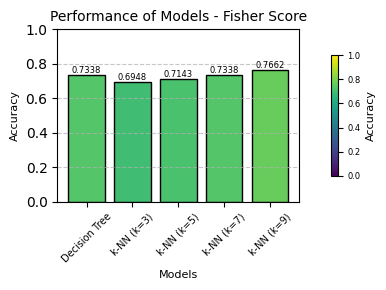

In [ ]:
plot_feature_selection_results("Fisher Score", results["Fisher Score"])

### iv. Analysis of Variance (ANOVA)

In [ ]:
# iv. Analysis of Variance (ANOVA)
anova = SelectKBest(f_classif, k=5).fit(X_train, y_train)
selected_features = anova.get_support(indices=True)
results['Analysis of Variance (ANOVA)'] = evaluate_model(X_train[:, selected_features],
                                                         X_test[:, selected_features],
                                                         y_train, y_test)
for technique, metrics in results.items():
    if technique == 'Analysis of Variance (ANOVA)':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Analysis of Variance (ANOVA)
 - Decision Tree: 73.3766
 - k-NN (k=3): 69.4805
 - k-NN (k=5): 71.4286
 - k-NN (k=7): 73.3766
 - k-NN (k=9): 76.6234


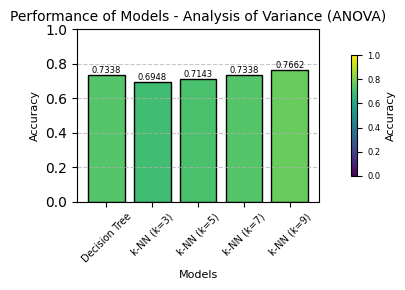

In [ ]:
plot_feature_selection_results("Analysis of Variance (ANOVA)",
                               results["Analysis of Variance (ANOVA)"])

### v. Chi-Square

In [ ]:
# v. Chi-Square
X_train_non_negative = X_train - X_train.min(axis=0)
X_test_non_negative = X_test - X_train.min(axis=0)  # Use the same shift as training

chi2_selector = SelectKBest(chi2, k=5).fit(X_train_non_negative, y_train)
selected_features = chi2_selector.get_support(indices=True)
results['Chi-Square'] = evaluate_model(X_train[:, selected_features],
                                       X_test[:, selected_features],
                                       y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Chi-Square':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Chi-Square
 - Decision Tree: 69.4805
 - k-NN (k=3): 69.4805
 - k-NN (k=5): 72.7273
 - k-NN (k=7): 69.4805
 - k-NN (k=9): 71.4286


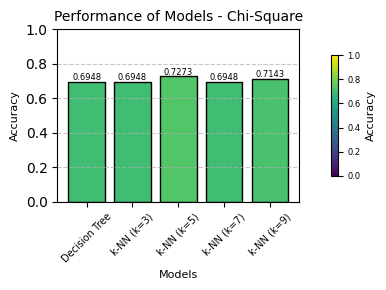

In [ ]:
plot_feature_selection_results("Chi-Square", results["Chi-Square"])

### vi. Correlation Coefficient

In [ ]:
# vi. Correlation Coefficient (reuse Pearson correlation)
selected_features = correlation_matrix.abs().sort_values(ascending=False).index[:5]
results['Correlation Coefficient'] = evaluate_model(X_train[:, selected_features],
                                                    X_test[:, selected_features],
                                                    y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Correlation Coefficient':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Correlation Coefficient
 - Decision Tree: 60.3896
 - k-NN (k=3): 63.6364
 - k-NN (k=5): 62.3377
 - k-NN (k=7): 61.6883
 - k-NN (k=9): 66.2338


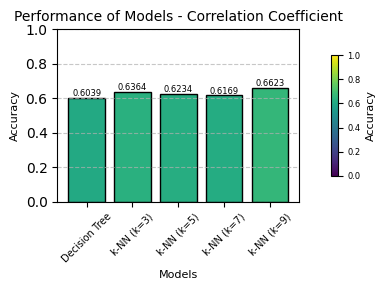

In [ ]:
plot_feature_selection_results("Correlation Coefficient",
                               results["Correlation Coefficient"])

### vii. Variance Threshold

In [ ]:
# vii. Variance Threshold
variance_selector = VarianceThreshold(threshold=0.01)
X_train_var = variance_selector.fit_transform(X_train)
X_test_var = variance_selector.transform(X_test)
results['Variance Threshold'] = evaluate_model(X_train_var, X_test_var, y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Variance Threshold':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Variance Threshold
 - Decision Tree: 73.3766
 - k-NN (k=3): 74.6753
 - k-NN (k=5): 76.6234
 - k-NN (k=7): 72.7273
 - k-NN (k=9): 74.0260


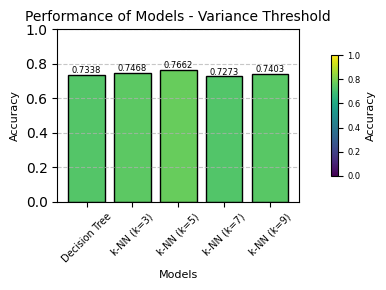

In [ ]:
plot_feature_selection_results("Variance Threshold", results["Variance Threshold"])

### viii. Mean Absolute Difference (MAD)

In [ ]:
# viii. Mean Absolute Difference (MAD)
mad = np.mean(np.abs(X_train - np.mean(X_train, axis=0)), axis=0)
selected_features = np.argsort(mad)[-5:]
results['Mean Absolute Difference (MAD)'] = evaluate_model(X_train[:,
                                                                   selected_features],
                                                           X_test[:, selected_features],
                                                           y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Mean Absolute Difference (MAD)':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Mean Absolute Difference (MAD)
 - Decision Tree: 74.0260
 - k-NN (k=3): 74.6753
 - k-NN (k=5): 75.3247
 - k-NN (k=7): 76.6234
 - k-NN (k=9): 76.6234


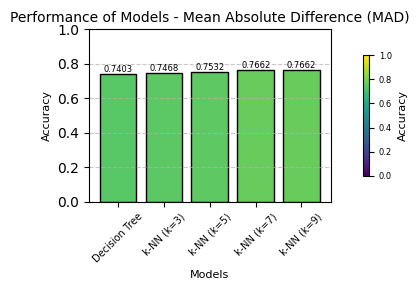

In [ ]:
plot_feature_selection_results("Mean Absolute Difference (MAD)",
                               results["Mean Absolute Difference (MAD)"])

### ix. Dispersion Ratio

In [ ]:
# ix. Dispersion Ratio
dispersion_ratio = np.var(X_train, axis=0) / (np.mean(X_train, axis=0) + 1e-10)
selected_features = np.argsort(dispersion_ratio)[-5:]
results['Dispersion Ratio'] = evaluate_model(X_train[:, selected_features],
                                             X_test[:, selected_features],
                                             y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Dispersion Ratio':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Dispersion Ratio
 - Decision Tree: 73.3766
 - k-NN (k=3): 66.8831
 - k-NN (k=5): 72.7273
 - k-NN (k=7): 74.6753
 - k-NN (k=9): 76.6234


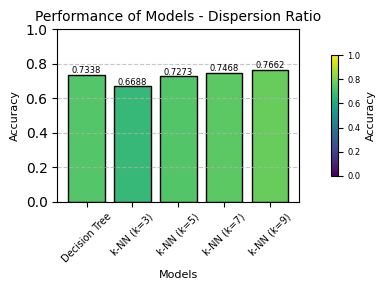

In [ ]:
plot_feature_selection_results("Dispersion Ratio", results["Dispersion Ratio"])

### x. Mutual Dependence

In [ ]:
# x. Mutual Dependence (reuse Information Gain)
selected_features = np.argsort(info_gain)[-5:]
results['Mutual Dependence'] = evaluate_model(X_train[:, selected_features],
                                              X_test[:, selected_features], y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Mutual Dependence':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Mutual Dependence
 - Decision Tree: 73.3766
 - k-NN (k=3): 69.4805
 - k-NN (k=5): 71.4286
 - k-NN (k=7): 73.3766
 - k-NN (k=9): 76.6234


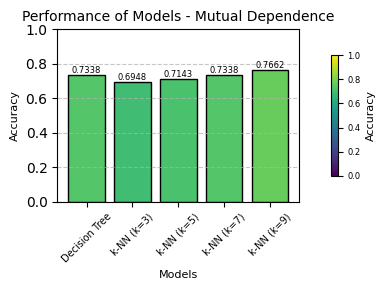

In [ ]:
plot_feature_selection_results("Mutual Dependence", results["Mutual Dependence"])

### xi. Relief

In [ ]:
# xi. Relief
selected_features = np.argsort(mutual_info_classif(X_train, y_train))[-5:]
results['Relief'] = evaluate_model(X_train[:, selected_features],
                                   X_test[:, selected_features],
                                   y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Relief':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Relief
 - Decision Tree: 73.3766
 - k-NN (k=3): 66.8831
 - k-NN (k=5): 70.1299
 - k-NN (k=7): 70.7792
 - k-NN (k=9): 70.7792


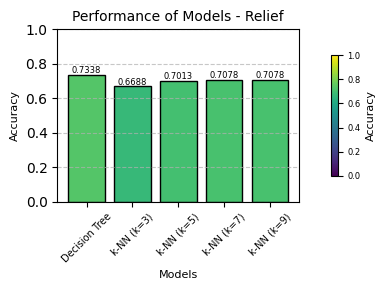

In [ ]:
plot_feature_selection_results("Relief", results["Relief"])

### xii. Missing Value Ratio

In [ ]:
# xii. Missing Value Ratio
X_missing_ratio = np.mean(X_train == 0, axis=0)
selected_features = np.argsort(X_missing_ratio)[:5]
results['Missing Value Ratio'] = evaluate_model(X_train[:, selected_features],
                                                X_test[:, selected_features],
                                                y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Missing Value Ratio':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Missing Value Ratio
 - Decision Tree: 73.3766
 - k-NN (k=3): 66.8831
 - k-NN (k=5): 72.7273
 - k-NN (k=7): 74.6753
 - k-NN (k=9): 76.6234


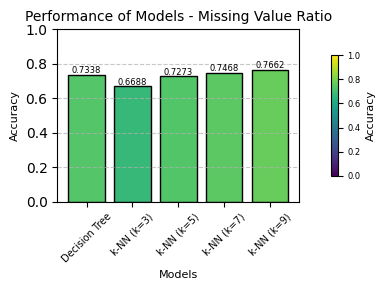

In [ ]:
plot_feature_selection_results("Missing Value Ratio", results["Missing Value Ratio"])

## Feature Selection Strategies

### i. Exhaustive Feature Selection

In [ ]:
# Perform exhaustive feature selection
def exhaustive_feature_selection(X_train, y_train, X_test, y_test, model, k=5):
    n_features = X_train.shape[1]
    best_score = -1
    best_features = None
    for feature_combo in combinations(range(n_features), k):
        model.fit(X_train[:, feature_combo], y_train)
        score = accuracy_score(y_test, model.predict(X_test[:, feature_combo]))
        if score > best_score:
            best_score = score
            best_features = feature_combo
    return best_features, best_score

# Replace mlxtend ExhaustiveFeatureSelector logic
dt = DecisionTreeClassifier(random_state=42)
knn_models = [KNeighborsClassifier(n_neighbors=k) for k in [3, 5, 7, 9]]

# Store results
exhaustive_results = {}
best_features, dt_accuracy = exhaustive_feature_selection(X_train, y_train,
                                                          X_test, y_test, dt, k=5)
exhaustive_results['Decision Tree'] = dt_accuracy

for knn_model in knn_models:
    _, knn_accuracy = exhaustive_feature_selection(X_train, y_train, X_test,
                                                   y_test, knn_model, k=5)
    exhaustive_results[f'k-NN (k={knn_model.n_neighbors})'] = knn_accuracy

results['Exhaustive Feature Selection'] = exhaustive_results

for technique, metrics in results.items():
    if technique == 'Exhaustive Feature Selection':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Exhaustive Feature Selection
 - Decision Tree: 74.6753
 - k-NN (k=3): 76.6234
 - k-NN (k=5): 79.2208
 - k-NN (k=7): 76.6234
 - k-NN (k=9): 77.9221


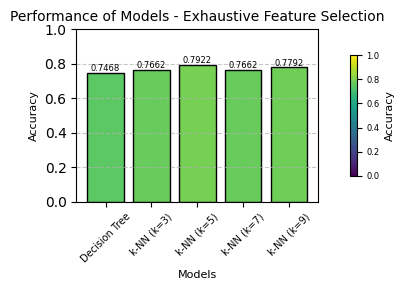

In [ ]:
plot_feature_selection_results("Exhaustive Feature Selection",
                               results["Exhaustive Feature Selection"])

### ii. Forward Feature Selection

In [ ]:
# Forward Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector
forward_selector = SequentialFeatureSelector(
    DecisionTreeClassifier(random_state=42),n_features_to_select=5,
    direction='forward').fit(X_train, y_train)
selected_features = forward_selector.get_support(indices=True)
results['Forward Feature Selection'] = evaluate_model(X_train[:, selected_features],
                                                      X_test[:, selected_features],
                                                      y_train, y_test)
for technique, metrics in results.items():
    if technique == 'Forward Feature Selection':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Forward Feature Selection
 - Decision Tree: 72.7273
 - k-NN (k=3): 75.3247
 - k-NN (k=5): 75.9740
 - k-NN (k=7): 76.6234
 - k-NN (k=9): 75.9740


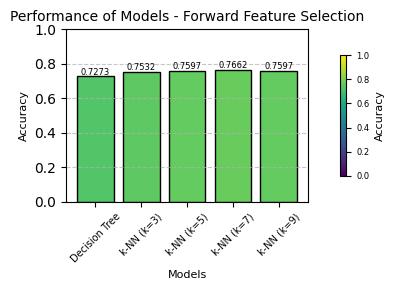

In [ ]:
plot_feature_selection_results("Forward Feature Selection",
                               results["Forward Feature Selection"])

### iii. Backward Feature Elimination

In [ ]:
# Backward Feature Elimination
backward_selector = SequentialFeatureSelector(DecisionTreeClassifier(random_state=42),
                                              n_features_to_select=5,
                                              direction='backward').fit(X_train, y_train)
selected_features = backward_selector.get_support(indices=True)
results['Backward Feature Elimination'] = evaluate_model(X_train[:, selected_features],
                                                         X_test[:, selected_features],
                                                         y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Backward Feature Elimination':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Backward Feature Elimination
 - Decision Tree: 73.3766
 - k-NN (k=3): 71.4286
 - k-NN (k=5): 70.1299
 - k-NN (k=7): 74.0260
 - k-NN (k=9): 74.0260


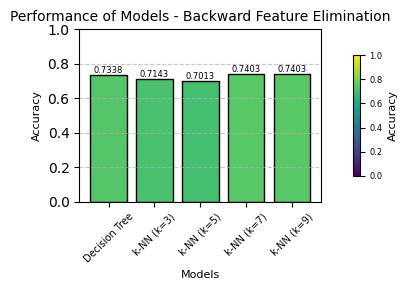

In [ ]:
plot_feature_selection_results("Backward Feature Elimination",
                               results["Backward Feature Elimination"])

### iv. Recursive Feature Elimination

In [ ]:
# Recursive Feature Elimination
rfe_selector = RFE(DecisionTreeClassifier(random_state=42),
                   n_features_to_select=5).fit(X_train, y_train)
selected_features = rfe_selector.get_support(indices=True)
results['Recursive Feature Elimination'] = evaluate_model(X_train[:, selected_features],
                                                          X_test[:, selected_features],
                                                          y_train, y_test)

for technique, metrics in results.items():
    if technique == 'Recursive Feature Elimination':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Recursive Feature Elimination
 - Decision Tree: 72.7273
 - k-NN (k=3): 75.9740
 - k-NN (k=5): 75.3247
 - k-NN (k=7): 74.6753
 - k-NN (k=9): 77.9221


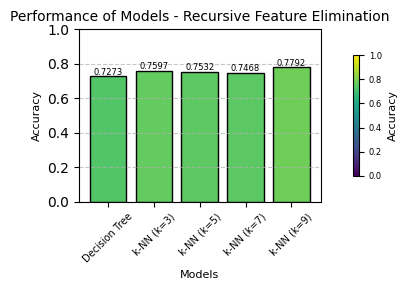

In [ ]:
plot_feature_selection_results("Recursive Feature Elimination",
                               results["Recursive Feature Elimination"])

### v. Bi-directional elimination

In [ ]:
# Perform bi-directional elimination
def bi_directional_elimination(X_train, y_train, X_test, y_test, model):
    n_features = X_train.shape[1]
    features = set(range(n_features))  # Start with all features
    best_score = -1
    best_features = set()

    while True:
        current_score = best_score

        # Forward Selection
        for feature in set(range(n_features)) - features:
            trial_features = list(features | {feature})
            model_clone = clone(model)
            model_clone.fit(X_train[:, trial_features], y_train)
            score = accuracy_score(y_test, model_clone.predict(X_test[:, trial_features]))
            if score > best_score:
                best_score = score
                best_features = features | {feature}

        # Backward Elimination
        for feature in list(features):
            trial_features = list(features - {feature})
            model_clone = clone(model)
            model_clone.fit(X_train[:, trial_features], y_train)
            score = accuracy_score(y_test, model_clone.predict(X_test[:, trial_features]))
            if score > best_score:
                best_score = score
                best_features = features - {feature}

        # If no improvement, stop
        if best_features == features:
            break

        features = best_features

    return list(best_features), best_score

dt = DecisionTreeClassifier(random_state=42)
knn_models = [KNeighborsClassifier(n_neighbors=k) for k in [3, 5, 7, 9]]

# Store results for Bi-Directional Elimination
bi_directional_results = {}
selected_features, dt_accuracy = bi_directional_elimination(X_train, y_train, X_test,
                                                            y_test, dt)
bi_directional_results['Decision Tree'] = dt_accuracy

for knn_model in knn_models:
    selected_features, knn_accuracy = bi_directional_elimination(X_train, y_train, X_test,
                                                                 y_test, knn_model)
    bi_directional_results[f'k-NN (k={knn_model.n_neighbors})'] = knn_accuracy

results['Bi-Directional Elimination'] = bi_directional_results

for technique, metrics in results.items():
    if technique == 'Bi-Directional Elimination':
        print(f"\nFeature Selection Technique: {technique}")
        for model, acc in metrics.items():
            print(f" - {model}: {acc*100:.4f}")


Feature Selection Technique: Bi-Directional Elimination
 - Decision Tree: 74.0260
 - k-NN (k=3): 79.2208
 - k-NN (k=5): 79.2208
 - k-NN (k=7): 77.2727
 - k-NN (k=9): 78.5714


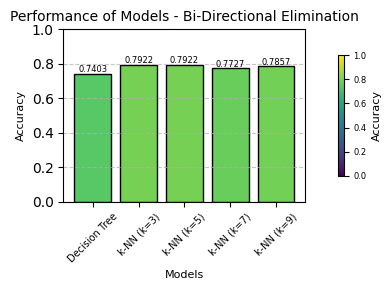

In [ ]:
plot_feature_selection_results("Bi-Directional Elimination",
                               results["Bi-Directional Elimination"])